# 1:Download the Requiremnets


In [10]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn xgboost

# 2 Import Libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve


# 2: Load the Dataset

In [12]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
data = pd.read_csv(url)



# 3: Data Display

In [13]:
# Display the first 5 rows
print(data.head())

# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check the distribution of the target variable (Machine failure)
print(data['Machine failure'].value_counts())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

# 5: Exploratory Data Analysis (EDA)
## 5.1: Basic Info and Missing Values

In [14]:
# Basic info
print(data.info())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## 5.2 : Visualize the Distribution of the Target Variable with Count Labels

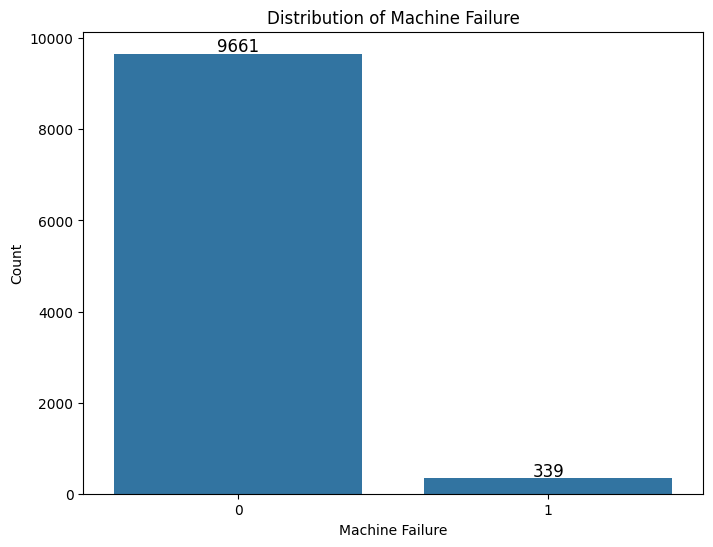

In [15]:
# Distribution of the target variable with count labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Machine failure', data=data)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

## 5.3: Visualize the Distribution of Numerical Features

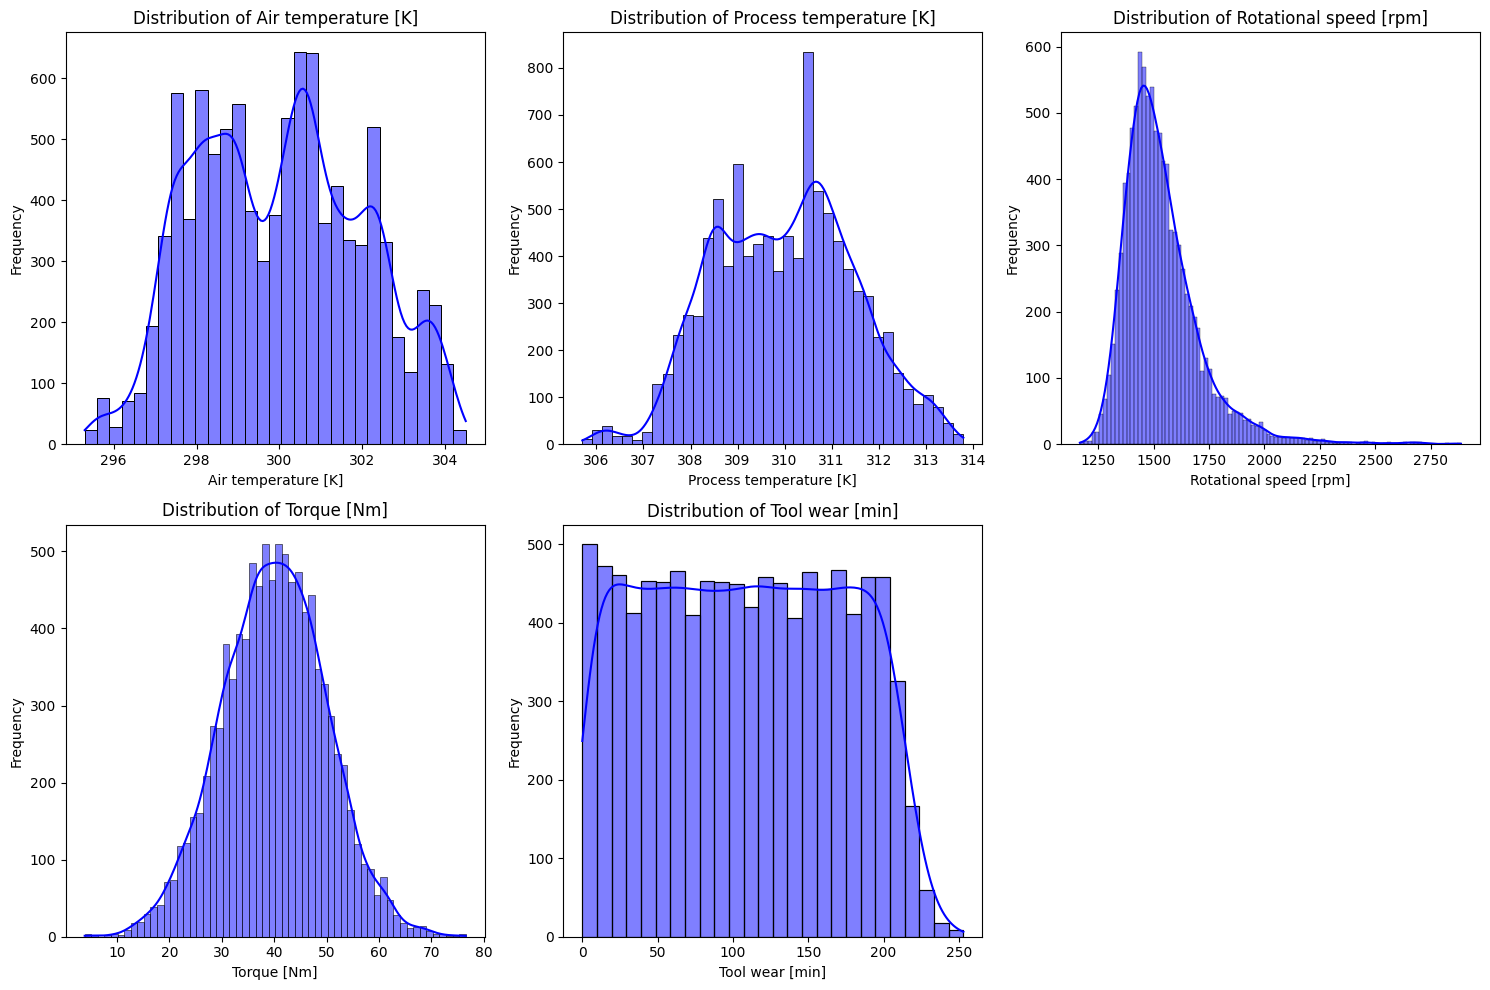

In [16]:
# List of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 5.4 : Visualize the Relationship Between Features and Target

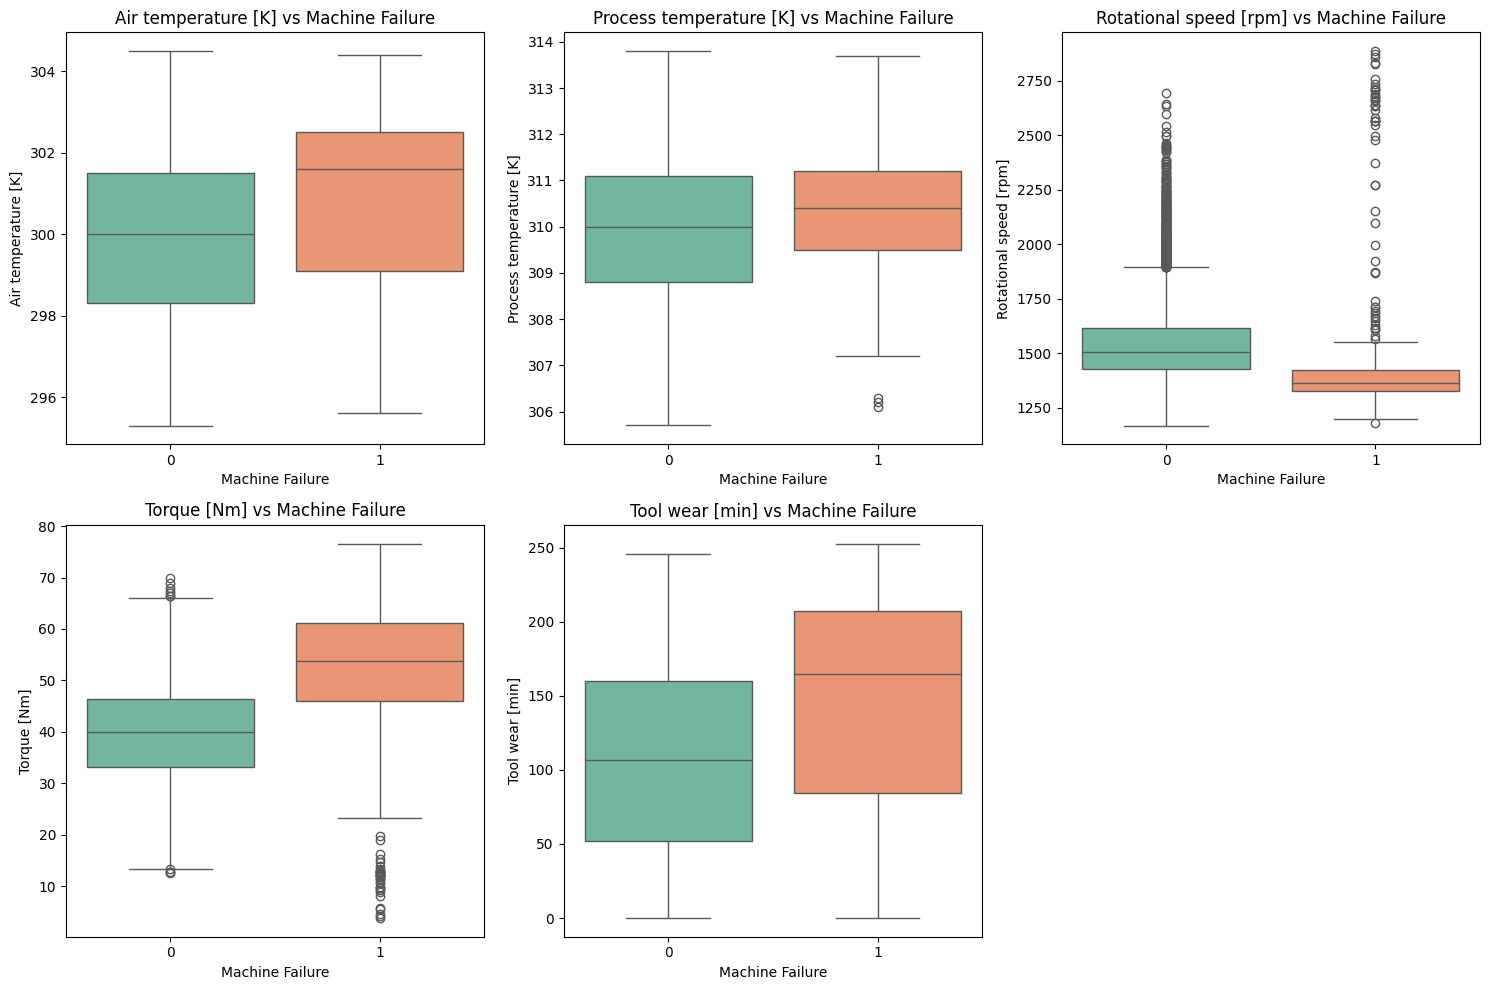

In [17]:
# Plot relationships between numerical features and target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Machine failure', y=feature, data=data, hue='Machine failure', palette='Set2', legend=False)
    plt.title(f'{feature} vs Machine Failure')
    plt.xlabel('Machine Failure')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# 6: Data Preprocessing
## 6.1: Encode Categorical Variables

In [18]:
# Encode the 'Type' column using one-hot encoding
data = pd.get_dummies(data, columns=['Type'], drop_first=True)

# Display the first 5 rows after encoding
print(data.head())

   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  Type_L  Type_M  
0    0    0    0    0   False    True  
1    0    0    0    0    True 

## 6.2: Feature Selection

In [19]:
# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID'], axis=1)

# Display the first 5 rows after dropping columns
print(data.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         42.8                0                0    0    0    0    0    0   
1         46.3                3                0    0    0    0    0    0   
2         49.4                5                0    0    0    0    0    0   
3         39.5                7                0    0    0    0    0    0   
4         40.0                9                0    0    0    0    0    0   

   Type_L  Type_M  
0   False    True  
1    True   False  
2    True   False  
3    T

## 6.3: Split the Data into Training and Testing Sets

In [20]:
# Separate features (X) and target (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set shape: (8000, 12)
Testing set shape: (2000, 12)
Training target shape: (8000,)
Testing target shape: (2000,)


#  7: Handle Class Imbalance
## 7.1: Apply SMOTE to Balance the Dataset

In [21]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print(pd.Series(y_train_res).value_counts())

Machine failure
0    7722
1    7722
Name: count, dtype: int64


#  8: Feature Scaling
## 8.1: Standardize Numerical Features

In [22]:
# List of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the training data
X_train_res[numerical_features] = scaler.fit_transform(X_train_res[numerical_features])

# Standardize the testing data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the first 5 rows of the standardized training data
print(X_train_res[numerical_features].head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -1.125397                -0.811742                0.332077   
1            -1.176896                -1.340053               -0.435365   
2            -1.176896                -1.792891                0.035871   
3             0.213567                 0.471299                0.274856   
4             0.471061                 0.244880                0.180608   

   Torque [Nm]  Tool wear [min]  
0    -0.981840         1.003560  
1     0.638026         0.171587  
2    -0.981840         0.989216  
3    -0.846257        -1.693180  
4    -0.782033         1.190037  


# 9: Model Building
## 9.1: Train a Logistic Regression Model

In [23]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1939
           1       0.50      0.95      0.66        61

    accuracy                           0.97      2000
   macro avg       0.75      0.96      0.82      2000
weighted avg       0.98      0.97      0.97      2000

Confusion Matrix:
[[1882   57]
 [   3   58]]
ROC-AUC Score: 0.9607115379737738


In [24]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf}")

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1939
           1       0.67      0.97      0.79        61

    accuracy                           0.98      2000
   macro avg       0.83      0.98      0.89      2000
weighted avg       0.99      0.98      0.99      2000

Confusion Matrix (Random Forest):
[[1910   29]
 [   2   59]]
ROC-AUC Score (Random Forest): 0.9761284758917473


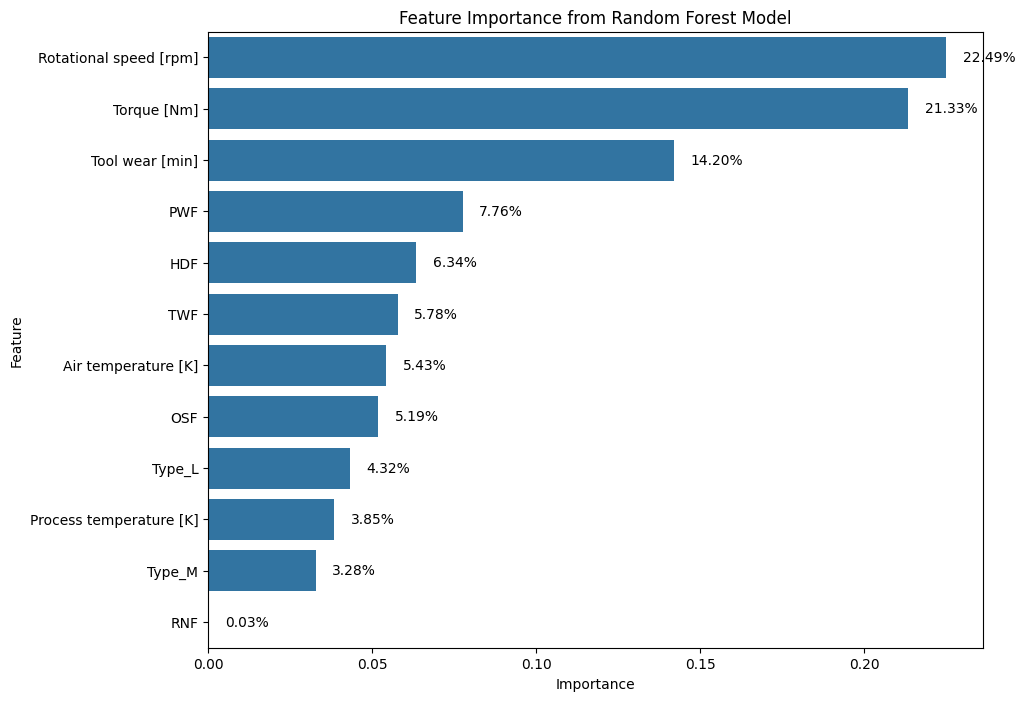

In [25]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train_res.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances with percentages
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df)

# Add percentage values next to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.005, p.get_y() + p.get_height() / 2, f'{width * 100:.2f}%',
             ha='left', va='center', fontsize=10)

plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

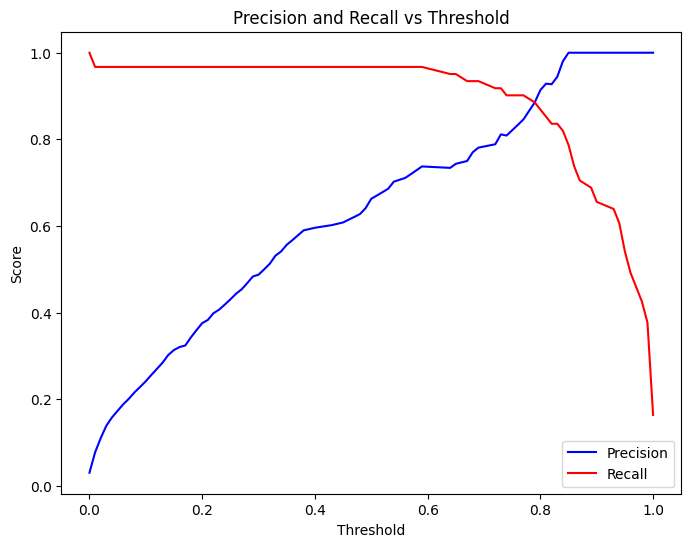

In [26]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (failure)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

In [27]:
# Set a custom threshold (e.g., 0.3)
threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the custom threshold
print("Classification Report (Threshold = 0.3):")
print(classification_report(y_test, y_pred_custom))

print("Confusion Matrix (Threshold = 0.3):")
print(confusion_matrix(y_test, y_pred_custom))

# Calculate ROC-AUC score
roc_auc_custom = roc_auc_score(y_test, y_pred_custom)
print(f"ROC-AUC Score (Threshold = 0.3): {roc_auc_custom}")

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1939
           1       0.49      0.97      0.65        61

    accuracy                           0.97      2000
   macro avg       0.74      0.97      0.82      2000
weighted avg       0.98      0.97      0.97      2000

Confusion Matrix (Threshold = 0.3):
[[1877   62]
 [   2   59]]
ROC-AUC Score (Threshold = 0.3): 0.9676189348912317


In [28]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'random_forest_predictive_maintenance_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [29]:
# Load the saved model
loaded_model = joblib.load('random_forest_predictive_maintenance_model.pkl')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print("Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded))

print("Confusion Matrix (Loaded Model):")
print(confusion_matrix(y_test, y_pred_loaded))

Classification Report (Loaded Model):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1939
           1       0.67      0.97      0.79        61

    accuracy                           0.98      2000
   macro avg       0.83      0.98      0.89      2000
weighted avg       0.99      0.98      0.99      2000

Confusion Matrix (Loaded Model):
[[1910   29]
 [   2   59]]
